# Huang Lab - Journel Club
####  *- R. Andres Parra Sperberg*

## 1. PyRosetta Setup

### Import PyRosetta

In [1]:
from pyrosetta import *
init()

core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: 2018.51.post.dev+654.v2019.01dev60566.dbc838b6ae6 dbc838b6ae620b1293476b1bd4366ffc2facc5b5 ssh://git@github.com/RosettaCommons/main 2019-01-03T10:31:13
core.init: command: PyRosetta -ex1 -ex2aro -database /Users/parraspandres/anaconda3/envs/pyrosetta-code-school/lib/python3.6/site-packages/pyrosetta/database
core.init: 'RNG device' seed mode, using '/dev/urandom', seed=979183654 seed_offset=0 real_seed=979183654
core.init.random: RandomGenerator:init: Normal mode, seed=979183654 RG_type=mt19937


### Import a pdb

In [3]:
from pyrosetta.toolbox import pose_from_rcsb
ras = pose_from_rcsb("6Q21")
# ras = pose_from_pdb("6Q21.pdb")

core.chemical.GlobalResidueTypeSet: Finished initializing fa_standard residue type set.  Created 636 residue types
core.chemical.GlobalResidueTypeSet: Total time to initialize 1.18594 seconds.
core.import_pose.import_pose: File '6Q21.clean.pdb' automatically determined to be of type PDB


### Get Structural Information

In [4]:
# take a look at the sequence
print(' sequence is: ')
print(ras.sequence())

# what is residue 500?
print('\n residue 500 is: ')
res_500 = ras.residue(500) # residue object
print(res_500.name())
print(res_500.is_charged())

# what is chain and number of 500th residue?
print('\n chain and number of residue 500: ')
print(ras.pdb_info().chain(500))
print(ras.pdb_info().number(500))

# convert between pose and pdb
print('\n convert from pose to pdb: ')
print(ras.pdb_info().pose2pdb(500))
print(ras.pdb_info().pdb2pose('C',158))

# get phi/psi/chi of residue 5
print('\n get phi/psi/chi of residue 500: ')
print(ras.phi(500))
print(ras.psi(500))
print(ras.chi(1, 500))

# compute bond lengths
print('\n compute bond length: ')
N_xyz = res_500.xyz("N")
CA_xyz = res_500.xyz("CA") # print(type(N_xyz))
C_xyz = res_500.xyz("C")
# print(ras.residue(500).atom_name(2)) # gives 'CA'
CA_N = CA_xyz - N_xyz
CA_C = CA_xyz - C_xyz
print(CA_N.norm())
print(CA_C.norm())

# compute bond angle between N, CA, and C
print('\n compute bond angle: ')
import math
numerator = CA_N.dot(CA_C)
denominator = CA_N.norm() * CA_C.norm()
angle = math.acos(numerator/denominator)
print(angle)

# Change the phi/psi/chi
ras.set_phi(5, -60)
ras.set_psi(5, -43)
ras.set_chi(1, 5, 180)

# change the bond angles (use conformation object, has limited scope)
R500N = AtomID(1, 500)
R500CA = AtomID(2, 500)
R500C = AtomID(3, 500)
ras.conformation().set_bond_length(R500N, R500CA, 1.5)
ras.conformation().set_bond_angle(R500N, R500CA, R500C, 110./180.*3.14159)

 sequence is: 
MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGQEEYSAMRDQYMRTGEGFLCVFAINNTKSFEDIHQYREQIKRVKDSDDVPMVLVGNKCDLAARTVESRQAQDLARSYGIPYIETSAKTRQGVEDAFYTLVREIRQHKLRKLMTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGQEEYSAMRDQYMRTGEGFLCVFAINNTKSFEDIHQYREQIKRVKDSDDVPMVLVGNKCDLAARTVESRQAQDLARSYGIPYIETSAKTRQGVEDAFYTLVREIRQHKLRKLMTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGQEEYSAMRDQYMRTGEGFLCVFAINNTKSFEDIHQYREQIKRVKDSDDVPMVLVGNKCDLAARTVESRQAQDLARSYGIPYIETSAKTRQGVEDAFYTLVREIRQHKLRKLMTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGQEEYSAMRDQYMRTGEGFLCVFAINNTKSFEDIHQYREQIKRVKDSDDVPMVLVGNKCDLAARTVESRQAQDLARSYGIPYIETSAKTRQGVEDAFYTLVREIRQHKLRKL

 residue 500 is: 
THR
False

 chain and number of residue 500: 
C
158

 convert from pose to pdb: 
158 C 
500

 get phi/psi/chi of residue 500: 
-56.62014477565
-35.701623198427875
-59.259459183231186

 compute bond length: 
1.4553216139396887
1.5141799760926702

 compute bond angle: 
1.92830513397

### Score Structure

In [5]:
# Define a score function
from pyrosetta.teaching import *
scorefxn = get_fa_scorefxn()

# you can also set your own custom score function
scorefxn2 = ScoreFunction()
scorefxn2.set_weight(fa_atr, 1.0)
scorefxn2.set_weight(fa_rep, 1.0)

# show score
print('\n show score: ')
print(scorefxn(ras))
print(scorefxn2(ras))

# break energy into individual pieces with show method
print('\n show components of first score: ')
scorefxn.show(ras)
print('\n and show for the second energy function: ')
scorefxn2.show(ras)

# you can get individual energy of a residue
print('\n individual residue energy: ')
print(ras.energies().show(24))

# The hydrogen score component are stored HBondSet object
print('\n hydrogen bond network: ')
hbond_set = ras.get_hbonds()
# from rosetta.core.scoring.hbonds import HBondSet
# hbond_set = HBondSet(ras, True) # False for only bb-bb Hbonds

# find hydrogen-bonds for residue #500
res_hbonds = hbond_set.residue_hbonds(500, False)
res_hbond = res_hbonds[1] # the first hydrogen bond
don_res = res_hbond.don_res()
acc_res = res_hbond.acc_res()
don_hatm = res_hbond.don_hatm()
acc_atm = res_hbond.acc_atm()

print(don_res)
print(don_hatm)
print(acc_res)
print(acc_atm)

print('donor and acceptor residues are')
print(ras.residue(don_res).name())
print(ras.residue(acc_res).name())

print('donor and acceptor atoms are')
print(ras.residue(don_res).atom_name(8))
print(ras.residue(acc_res).atom_name(4))


# use EMapVector() class to store energy data
# for instance, store contact independent two-body interaction energies
res_num1 = ras.pdb_info().pdb2pose('D', 102)
res_num2 = ras.pdb_info().pdb2pose('A', 108)
rsd1= ras.residue(res_num1)
rsd2 = ras.residue(res_num2)
emap = EMapVector()
scorefxn.eval_ci_2b(rsd1, rsd2, ras, emap)
print(emap[fa_atr])
print(emap[fa_rep])
print(emap[fa_sol])

core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
core.scoring.etable: Starting energy table calculation
core.scoring.etable: smooth_etable: changing atr/rep split to bottom of energy well
core.scoring.etable: smooth_etable: spline smoothing lj etables (maxdis = 6)
core.scoring.etable: smooth_etable: spline smoothing solvation etables (max_dis = 6)


/Users/parraspandres/anaconda3/envs/pyrosetta-code-school/lib/python3.6/site-packages/pyrosetta/teaching.py:13: UserWarning: Import of 'rosetta' as a top-level module is deprecated and may be removed in 2018, import via 'pyrosetta.rosetta'.
  from rosetta.core.scoring import *


core.scoring.etable: Finished calculating energy tables.
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/HBPoly1D.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/HBFadeIntervals.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/HBEval.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/DonStrength.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/AccStrength.csv
basic.io.database: Database file opened: scoring/score_functions/rama/fd/all.ramaProb
basic.io.database: Database file opened: scoring/score_functions/rama/fd/prepro.ramaProb
basic.io.database: Database file opened: scoring/score_functions/omega/omega_ppdep.all.txt
basic.io.database: Database file opened: scoring/score_functions/omega/omega_ppdep.gly.txt
basic.io.database: Database file opened: scoring/score_functions/omega/omeg

## 2. PyRosetta Example (Version #1)

In this example we attempt to enhance the binding affinity of MAM superantigen to MHC by mutating MAM and then doing full-atom docking to MHC.

In [6]:
##################################################################
################### IMPORT MODULES ###############################
##################################################################

# import pyrosetta
from pyrosetta import *
init()

# import additional modules
from pyrosetta.teaching import *
import rosetta.protocols.rigid as rigid_moves
from rosetta.protocols.minimization_packing import *
from pyrosetta import PyMOLMover


# import and clean pdb (superantigen + TCR + MHC)
from pyrosetta.toolbox import cleanATOM
cleanATOM("2ICW_MHC.pdb")
pose = pose_from_pdb("2ICW_MHC.clean.pdb")

core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: 2018.51.post.dev+654.v2019.01dev60566.dbc838b6ae6 dbc838b6ae620b1293476b1bd4366ffc2facc5b5 ssh://git@github.com/RosettaCommons/main 2019-01-03T10:31:13
core.init: command: PyRosetta -ex1 -ex2aro -database /Users/parraspandres/anaconda3/envs/pyrosetta-code-school/lib/python3.6/site-packages/pyrosetta/database
core.init: 'RNG device' seed mode, using '/dev/urandom', seed=-1765136072 seed_offset=0 real_seed=-1765136072
core.init.random: RandomGenerator:init: Normal mode, seed=-1765136072 RG_type=mt19937
core.import_pose.import_pose: File '2ICW_MHC.clean.pdb' automatically determined to be of type PDB
core.conformation.Conformation: Found disulfide between residues 102 158
core.conformation.Conformation: current variant for 102 CYS
core.conformation.Conformation: current variant for 158 CYS
core.conformation.Conformation: current variant for 102 CYD
core.conformation.Conformation: current variant f

In [7]:
##################################################################
################### IMPORT PDB ###################################
##################################################################

# make full-atom starting pose
fa_starting = Pose()
fa_starting.assign(pose)
# make a full-atom working pose
fa_working = Pose()
fa_working.assign(pose)

In [8]:
##################################################################
################### MUTATE PROTEIN ###############################
##################################################################

# make score function
scorefxn = get_fa_scorefxn()

# mutate protein
print(fa_working.pdb_info().pdb2pose('H', 12))
mutater = pyrosetta.rosetta.protocols.simple_moves.MutateResidue()
mutater.set_target(386)
mutater.set_res_name('PRO')
mutater.apply(fa_working)

# see in PyMOL
pymol = PyMOLMover()
pymol.pymol_name('mutated_superantigen')
pymol.apply(fa_working)

core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
386


In [ ]:
##################################################################
################### RELAX LOCALLY ################################
##################################################################

# relax pose, store lowest energy

from fast_relax_function import *
fast_relax(fa_working, fast_relax_rounds=1)

In [10]:
##################################################################
################### DOCK PROTEIN #################################
##################################################################

# initialize minimization
min_mover = MinMover()
movemap = MoveMap()
movemap.set_bb(True)
min_mover.movemap(movemap)
min_mover.score_function(scorefxn)

# print pdb pose_tree
print(fa_working.fold_tree())

# change fold tree to keep DEF fixed and move H
setup_foldtree(fa_working, "DEF_H", Vector1([1])) # "DEF_H"
print(fa_working.fold_tree())

# set jump information
jump_num = 1
print(fa_working.jump(jump_num).get_rotation())
print(fa_working.jump(jump_num).get_translation())

# display starting energy
starting_score = scorefxn(fa_starting)
print('starting pose energy: ')
print(starting_score)

# Loop through and store lowest energy docking pose
lowest_energy_pose = Pose()
lowest_energy = float('inf')

for i in range(3):
  # rotate and translate superantigen (8 degrees rot, 3 ang trans)
  pert_mover = rigid_moves.RigidBodyPerturbMover(jump_num, 8, 3)
  pert_mover.apply(fa_working)

  # minimize the energy
  min_mover.apply(fa_working)

  # score pose
  print('working pose energy: ')
  curr_score = scorefxn(fa_working)
  print(curr_score)

  # store values
  if curr_score < lowest_energy:
    lowest_energy = curr_score
    lowest_energy_pose.assign(fa_working)

FOLD_TREE  EDGE 1 176 -1  EDGE 1 177 1  EDGE 177 361 -1  EDGE 1 362 2  EDGE 362 374 -1  EDGE 1 375 3  EDGE 375 587 -1 
FOLD_TREE  EDGE 1 25 -1  EDGE 25 176 -1  EDGE 25 435 1  EDGE 176 177 3  EDGE 435 375 -1  EDGE 435 587 -1  EDGE 177 361 -1  EDGE 361 362 2  EDGE 362 374 -1 
    -0.7427470419789715     -0.4466893731711531      0.4987939810457338
    -0.1069639674094453     -0.6562204513419687     -0.7469494152327687
     0.6609731774493730     -0.6081474518046648      0.4396261315663273

     -5.526332418188776      -39.75966177953298       20.61083179255078
starting pose energy: 
1159.0616627644279
working pose energy: 
14007.549284103663
working pose energy: 
69923.04626225976
working pose energy: 
49626.75136507284


In [11]:
##################################################################
################### SCORE ########################################
##################################################################

# find score of best protein
print('best energy: ')
print(scorefxn(lowest_energy_pose))

pymol.pymol_name('docked_superantigen')
pymol.apply(lowest_energy_pose)

best energy: 
14007.549284103663


## 3. PyRosetta Example (Version #2)

In this example we attempt to enhance the binding affinity of MAM superantigen to MHC by doing centroid/full-atom docking, then FastDesign of the interface residues.

In [1]:
##################################################################
################### IMPORT MODULES ###############################
##################################################################

# import pyrosetta
from pyrosetta import *
init("-mh:path:scores_BB_BB motif_dock/xh_16_ -mh:score:use_ss1 false -mh:score:use_ss2 false -mh:score:use_aa1 true -mh:score:use_aa2 true") # for docking

# setup pymol
from pyrosetta import PyMOLMover
pymol = PyMOLMover()


# import additional modules
from pyrosetta.teaching import *
import rosetta.protocols.rigid as rigid_moves
from rosetta.protocols.minimization_packing import *
from pyrosetta import PyMOLMover
import numpy as np
from rosetta.protocols import minimization_packing as pack_min
from rosetta.protocols.relax import FastRelax
import matplotlib.pyplot as plt

# import and clean pdb (superantigen + TCR + MHC)
from pyrosetta.toolbox import cleanATOM
cleanATOM("2ICW_MHC.pdb")
pose = pose_from_pdb("2ICW_MHC.clean.pdb")

core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: 2018.51.post.dev+654.v2019.01dev60566.dbc838b6ae6 dbc838b6ae620b1293476b1bd4366ffc2facc5b5 ssh://git@github.com/RosettaCommons/main 2019-01-03T10:31:13
core.init: command: PyRosetta -mh:path:scores_BB_BB motif_dock/xh_16_ -mh:score:use_ss1 false -mh:score:use_ss2 false -mh:score:use_aa1 true -mh:score:use_aa2 true -database /Users/parraspandres/anaconda3/envs/pyrosetta-code-school/lib/python3.6/site-packages/pyrosetta/database
core.init: 'RNG device' seed mode, using '/dev/urandom', seed=-208920004 seed_offset=0 real_seed=-208920004
core.init.random: RandomGenerator:init: Normal mode, seed=-208920004 RG_type=mt19937


/Users/parraspandres/anaconda3/envs/pyrosetta-code-school/lib/python3.6/site-packages/pyrosetta/teaching.py:13: UserWarning: Import of 'rosetta' as a top-level module is deprecated and may be removed in 2018, import via 'pyrosetta.rosetta'.
  from rosetta.core.scoring import *


core.chemical.GlobalResidueTypeSet: Finished initializing fa_standard residue type set.  Created 636 residue types
core.chemical.GlobalResidueTypeSet: Total time to initialize 1.18884 seconds.
core.import_pose.import_pose: File '2ICW_MHC.clean.pdb' automatically determined to be of type PDB
core.conformation.Conformation: Found disulfide between residues 102 158
core.conformation.Conformation: current variant for 102 CYS
core.conformation.Conformation: current variant for 158 CYS
core.conformation.Conformation: current variant for 102 CYD
core.conformation.Conformation: current variant for 158 CYD
core.conformation.Conformation: Found disulfide between residues 191 255
core.conformation.Conformation: current variant for 191 CYS
core.conformation.Conformation: current variant for 255 CYS
core.conformation.Conformation: current variant for 191 CYD
core.conformation.Conformation: current variant for 255 CYD
core.conformation.Conformation: Found disulfide between residues 288 344
core.conf

In [6]:
##################################################################
################### SETUP POSES ##################################
##################################################################

# make full-atom starting pose
fa_starting = Pose()
fa_starting.assign(pose)
# make a full-atom working pose
fa_working = Pose()
fa_working.assign(pose)
# show starting
pymol.pymol_name("starting_pose")
pymol.apply(fa_starting)

In [5]:
##################################################################
########################## RELAX #################################
##################################################################

# Set up task Factory
tf_relax = TaskFactory()
tf_relax.push_back(operation.RestrictToRepacking())

# Set up packer for pose
packer_relax = pack_min.PackRotamersMover()
packer_relax.task_factory(tf_relax) # sets the task factory to the packer
packer_relax.apply(fa_working) # applies packer to pose

# Initializes fast relax class
fr = FastRelax()

# score function for fast relax
sfxn_relax = get_score_function()
fr.set_scorefxn(sfxn_relax)

# apply fast relax to pose
fr.apply(fa_working)

pymol.pymol_name("relaxed_pose")
pymol.apply(fa_starting)
pose.dump_pdb("2ICW_MHC_relaxed.pdb")

NameError: name 'TaskFactory' is not defined

In [4]:
##################################################################
##################################################################
##################################################################
##################################################################
############################# DOCK ###############################
##################################################################
##################################################################
##################################################################
##################################################################

In [7]:
##################################################################
########################### IMPORT ###############################
##################################################################

# load a protein:
dock_pose = fa_working.clone()
native_pose = fa_starting.clone()

In [8]:
##################################################################
################### SWITCH TO CENTROID ###########################
##################################################################

# switch to centroid
switch = SwitchResidueTypeSetMover("centroid")
switch.apply(dock_pose)
switch.apply(native_pose)

core.chemical.GlobalResidueTypeSet: Finished initializing centroid residue type set.  Created 62 residue types
core.chemical.GlobalResidueTypeSet: Total time to initialize 0.045331 seconds.


In [9]:
##################################################################
################### CHANGE FOLD TREE #############################
##################################################################

# print pdb pose_tree
print(dock_pose.fold_tree())

# change fold tree to keep DEF fixed and move H
setup_foldtree(dock_pose, "DEF_H", Vector1([1])) # "DEF_H"
print(dock_pose.fold_tree())

# set jump information
jump_num = 1

FOLD_TREE  EDGE 1 176 -1  EDGE 1 177 1  EDGE 177 361 -1  EDGE 1 362 2  EDGE 362 374 -1  EDGE 1 375 3  EDGE 375 587 -1 
FOLD_TREE  EDGE 1 25 -1  EDGE 25 176 -1  EDGE 25 435 1  EDGE 176 177 3  EDGE 435 375 -1  EDGE 435 587 -1  EDGE 177 361 -1  EDGE 361 362 2  EDGE 362 374 -1 


In [10]:
##################################################################
#################### CENTROID ENERGY FUNCTION ####################
##################################################################

# this is the table used for centroid mode docking
motif_dock_score = create_score_function("motif_dock_score")

# what is the score?
print(motif_dock_score(dock_pose))

core.scoring.motif: init MotifHashManager
core.scoring.motif: reading xform_score_data_BB_BB
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_AA.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_AC.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_AD.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_AE.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_AF.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_AG.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_AH.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_AI.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_AK.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_AL.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_AM.xh.bin.gz
core.

core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_FM.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_FN.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_FP.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_FQ.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_FR.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_FS.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_FT.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_FV.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_FW.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_FY.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_GA.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_GC.xh.bin.gz
core.scoring.mot

core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_LD.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_LE.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_LF.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_LG.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_LH.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_LI.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_LK.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_LL.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_LM.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_LN.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_LP.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_LQ.xh.bin.gz
core.scoring.mot

core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_QR.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_QS.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_QT.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_QV.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_QW.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_QY.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_RA.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_RC.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_RD.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_RE.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_RF.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_RG.xh.bin.gz
core.scoring.mot

core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_WH.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_WI.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_WK.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_WL.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_WM.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_WN.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_WP.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_WQ.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_WR.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_WS.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_WT.xh.bin.gz
core.scoring.motif: XformScore::read_binary(fname): motif_dock/xh_16_WV.xh.bin.gz
core.scoring.mot

protocols.TrialMover: Acceptance rate: 0.24
0.24
protocols.TrialMover: Acceptance rate: 0.02
0.02
protocols.TrialMover: Acceptance rate: 0
0.0
protocols.TrialMover: Acceptance rate: 0.04
0.04
protocols.TrialMover: Acceptance rate: 0.04
0.04
protocols.TrialMover: Acceptance rate: 0
0.0
protocols.TrialMover: Acceptance rate: 0
0.0
protocols.TrialMover: Acceptance rate: 0
0.0
protocols.TrialMover: Acceptance rate: 0.02
0.02
protocols.TrialMover: Acceptance rate: 0
0.0
protocols.moves.MonteCarlo: MonteCarlo:: last_accepted_score,lowest_score: -86.5257 -86.5257
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -6.27451017e-02
 -1.25490203e-01 -8.21960805e+00 -1.70980398e+01 -1.70980398e+01
 -1.70980398e+01 -1.70980398e+01 -1.70980398e+01 -1.70980398e+01
 -1.99917378e+01 -2.08627458e+01 -2.97411771e+01 -2.97411771e+01
 -2.97411771e+01 -2.97411771e+01 -2.97411771e+01 -2.97411771e+01
 -2.97411771e+01 -2.97411771e+01 -2.97411771e+01 -2.97411771e+01
 -2.97411771e+01 -2.97411771e+01 -2.97411771e+0

True

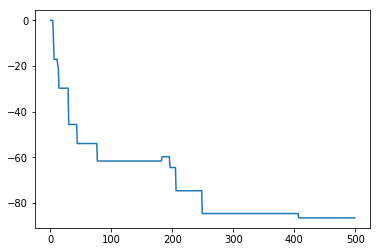

In [22]:
##################################################################
############### BROAD LOCAL CENTROID MODE ########################
##################################################################

# setup rigid body mover
trans_mag = 3
rot_mag = 8
import rosetta.protocols.rigid as rigid_moves
rigid_body_mover = rigid_moves.RigidBodyPerturbMover(1, rot_mag, trans_mag)
rigid_body_mover.apply(dock_pose)

# store the scores and Lrmsd
scores = np.array([])
Lrmsd = np.array([])

# add mover to the trial mover
kT = 0.8
mc = MonteCarlo(dock_pose, motif_dock_score, kT)
trial_mover = TrialMover(rigid_body_mover, mc)
# trial_mover.apply(ras)
# mc.recover_low(dock_pose)

# loop through the monte carlo object
for i in range(10):
    for j in range(50):

        # apply the mover and update mc object
        trial_mover.apply(dock_pose)
        #pymol.apply(working_pose)

        # store scores and Lrmsd
        scores = np.append(scores, motif_dock_score(dock_pose))
        Lrmsd = np.append(Lrmsd, calc_Lrmsd(dock_pose, native_pose, Vector1([1])))

    # get the acceptance rate
    acc = trial_mover.acceptance_rate()
    print(acc)


    # change the magnitude dynamically
    if acc < 0.5:
        trans_mag = trans_mag*0.9
        rot_mag = rot_mag*0.9
        rigid_body_mover.trans_magnitude(trans_mag)
        rigid_body_mover.rot_magnitude(rot_mag)

        # now, update the trial mover with the new rigid body mover
        trial_mover = TrialMover(rigid_body_mover, mc)

    elif acc > 0.5:
        trans_mag = trans_mag*1.1
        rot_mag = rot_mag*1.1
        rigid_body_mover.trans_magnitude(trans_mag)
        rigid_body_mover.rot_magnitude(rot_mag)

        # now, update the trial mover with the new rigid body mover
        trial_mover = TrialMover(rigid_body_mover, mc)

mc.show_scores()
mc.recover_low(dock_pose)

# make plot of scores vs iteration
print(scores)
plt.plot(scores) # first plot, scores vs iteration... point = we take lowest energy structure.

# store structure
pymol.pymol_name("centroid_dock")
pymol.apply(dock_pose)
dock_pose.dump_pdb("centroid_dock.pdb")

In [10]:
##################################################################
##################### SWITCH BACK TO FULL-ATOM ###################
##################################################################

switch_back = SwitchResidueTypeSetMover("fa_standard")
switch_back.apply(dock_pose)
#pymol.pymol_name("fa_pose")
#pymol.apply(working_pose)

In [11]:
##################################################################
############### FULL-ATOM ENERGY FUNCTION ########################
##################################################################

fa_sfxn = create_score_function("ref2015")

core.scoring.etable: Starting energy table calculation
core.scoring.etable: smooth_etable: changing atr/rep split to bottom of energy well
core.scoring.etable: smooth_etable: spline smoothing lj etables (maxdis = 6)
core.scoring.etable: smooth_etable: spline smoothing solvation etables (max_dis = 6)
core.scoring.etable: Finished calculating energy tables.
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/HBPoly1D.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/HBFadeIntervals.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/HBEval.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/DonStrength.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/AccStrength.csv
basic.io.database: Database file opened: scoring/score_functions/rama/fd/all.ramaProb
basic.io.database: Database file opened: scor

basic.io.database: Database file opened: scoring/score_functions/elec_cp_reps.dat
core.scoring.elec.util: Read 40 countpair representative atoms
core.pack.dunbrack.RotamerLibrary: shapovalov_lib_fixes_enable option is true.
core.pack.dunbrack.RotamerLibrary: shapovalov_lib::shap_dun10_smooth_level of 1( aka lowest_smooth ) got activated.
core.pack.dunbrack.RotamerLibrary: Binary rotamer library selected: /Users/parraspandres/anaconda3/envs/pyrosetta-code-school/lib/python3.6/site-packages/pyrosetta/database/rotamer/shapovalov/StpDwn_0-0-0/Dunbrack10.lib.bin
core.pack.dunbrack.RotamerLibrary: Using Dunbrack library binary file '/Users/parraspandres/anaconda3/envs/pyrosetta-code-school/lib/python3.6/site-packages/pyrosetta/database/rotamer/shapovalov/StpDwn_0-0-0/Dunbrack10.lib.bin'.
core.pack.dunbrack.RotamerLibrary: Dunbrack 2010 library took 0.385313 seconds to load from binary
protocols.TrialMover: Acceptance rate: 0
0.0
protocols.TrialMover: Acceptance rate: 0.3
0.3
protocols.TrialM

True

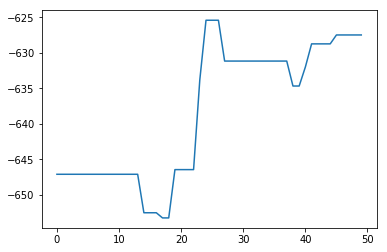

In [12]:
##################################################################
############### FULL-ATOM REFINEMENT #############################
##################################################################

# current magnitudes
trans_mag = 0.1
rot_mag = 5
rigid_body_mover.trans_magnitude(trans_mag)
rigid_body_mover.rot_magnitude(rot_mag)

# full-atom montecarlo object
kT = 0.8
mc_fa = MonteCarlo(dock_pose, fa_sfxn, kT)

# trial mover
trial_mover = TrialMover(rigid_body_mover, mc_fa)

# store the scores and Lrmsd
scores = np.array([])
Lrmsd = np.array([])

# current magnitudes
trans_mag = 0.1
rot_mag = 5
rigid_body_mover.trans_magnitude(trans_mag)
rigid_body_mover.rot_magnitude(rot_mag)

# add mover to the trial mover
trial_mover = TrialMover(rigid_body_mover, mc_fa)
# trial_mover.apply(ras)

# loop through the monte carlo object
for i in range(5):
    for j in range(10):

        # apply the mover and update mc object
        trial_mover.apply(dock_pose)
        #pymol.apply(working_pose)

        # store scores and Lrmsd
        scores = np.append(scores, motif_dock_score(dock_pose))
        Lrmsd = np.append(Lrmsd, calc_Lrmsd(dock_pose, native_pose, Vector1([1])))

    # get the acceptance rate
    acc = trial_mover.acceptance_rate()
    print(acc)

    # change the magnitude dynamically
    if acc < 0.5:
        trans_mag = trans_mag*0.9
        rot_mag = rot_mag*0.9
        rigid_body_mover.trans_magnitude(trans_mag)
        rigid_body_mover.rot_magnitude(rot_mag)

        # now, update the trial mover with the new rigid body mover
        trial_mover = TrialMover(rigid_body_mover, mc_fa)

    elif acc > 0.5:
        trans_mag = trans_mag*1.1
        rot_mag = rot_mag*1.1
        rigid_body_mover.trans_magnitude(trans_mag)
        rigid_body_mover.rot_magnitude(rot_mag)

        # now, update the trial mover with the new rigid body mover
        trial_mover = TrialMover(rigid_body_mover, mc_fa)

    # recover lowest observed pose
    mc_fa.recover_low(dock_pose)

    # pack the rotamers at the interface
    # interface_packer(dock_pose)

mc_fa.show_scores()
mc_fa.recover_low(dock_pose)
#pymol.apply(working_pose)

plt.plot(scores) # second plot, scores vs iteration... point = we take lowest energy structure for full-atom...

pymol.pymol_name("fa_dock")
pymol.apply(dock_pose)
dock_pose.dump_pdb("fa_dock.pdb")

In [14]:
##################################################################
############### MINIMIZE #########################################
##################################################################
# alternatively: fast relax...

# Create a MinMover Object to minimize pose
from rosetta.protocols.minimization_packing import *
min_mover = MinMover()
mm_dock = MoveMap()
mm_dock.set_bb(True)
min_mover.movemap(mm_dock)
min_mover.score_function(fa_sfxn)

min_mover.apply(dock_pose)


# find score of best protein
print('best energy: ')
print(fa_sfxn(dock_pose))

best energy: 
317766.34714170726


In [15]:
##################################################################
##################################################################
##################################################################
##################################################################
############################# DESIGN #############################
##################################################################
##################################################################
##################################################################
##################################################################

In [16]:
##################################################################
########################### IMPORT ###############################
##################################################################

# load a protein:
design_pose = dock_pose.clone()

In [23]:
##################################################################
################### RESIDUE SELECTOR #############################
##################################################################

#find the pose numbering from pdb numbering
start_residue = design_pose.pdb_info().pdb2pose('D', 55)
end_residue = design_pose.pdb_info().pdb2pose('D', 72)

#first define the main helix of the antigen in contact with the protein
Santigen_helix_selector = pyrosetta.rosetta.core.select.residue_selector.ResidueIndexSelector()
Santigen_helix_selector.set_index("{}-{}".format(start_residue, end_residue))
Santigen_helix_residue_vector = Santigen_helix_selector.apply(design_pose)

#find the neighbors
Santigen_helix_neighbor_selector = pyrosetta.rosetta.core.select.residue_selector.NeighborhoodResidueSelector(antigen_helix_residue_vector, 8, True)
Santigen_helix_neighbor_residue_vector = Santigen_helix_neighbor_selector.apply(design_pose)
not_Santigen_helix_neighbor_selector = pyrosetta.rosetta.core.select.residue_selector.NotResidueSelector(Santigen_helix_neighbor_selector)


#define the chain H residues belonging to the protein
H_selector = pyrosetta.rosetta.core.select.residue_selector.ChainSelector('H')
DEF_selector = pyrosetta.rosetta.core.select.residue_selector.ChainSelector('D,E,F')

#combine the chain selectors with the region selectors
combine_neighbor_H_selectors = pyrosetta.rosetta.core.select.residue_selector.AND_combine(Santigen_helix_neighbor_selector, H_selector)
not_combine_neighbor_H_selectors = pyrosetta.rosetta.core.select.residue_selector.NotResidueSelector(combine_neighbor_H_selectors)
H_residues_to_design = combine_neighbor_H_selectors.apply(design_pose)

combine_neighbor_DEF_selectors = pyrosetta.rosetta.core.select.residue_selector.AND_combine(Santigen_helix_neighbor_selector, DEF_selector)
not_combine_neighbor_DEF_selectors = pyrosetta.rosetta.core.select.residue_selector.NotResidueSelector(combine_DF_selectors)
DEF_residues_to_repack = combine_neighbor_DEF_selectors.apply(design_pose)

In [24]:
##################################################################
########################## PACKER ################################
##################################################################

# setup the packer-task
tf_design = pyrosetta.rosetta.core.pack.task.TaskFactory()

# These are pretty standard
tf_design.push_back(pyrosetta.rosetta.core.pack.task.operation.InitializeFromCommandline())
tf_design.push_back(pyrosetta.rosetta.core.pack.task.operation.IncludeCurrent())
tf_design.push_back(pyrosetta.rosetta.core.pack.task.operation.NoRepackDisulfides())


# Disable repacking/design on non-interface
tf_design.push_back(pyrosetta.rosetta.core.pack.task.operation.OperateOnResidueSubset(
    pyrosetta.rosetta.core.pack.task.operation.PreventRepackingRLT(), not_Santigen_helix_neighbor_selector))

# Disable design (just repack) on MHC
tf_design.push_back(pyrosetta.rosetta.core.pack.task.operation.OperateOnResidueSubset(
    pyrosetta.rosetta.core.pack.task.operation.RestrictToRepackingRLT(), DEF_residues_to_repack))

# Convert the task factory into a PackerTask
packer_task_design = tf_design.create_task_and_apply_taskoperations(design_pose)

# View the PackerTask
print(packer_task_design)

core.pack.task: Packer task: initialize from command line()
#Packer_Task

resid	pack?	design?	allowed_aas
1	FALSE	FALSE	
2	FALSE	FALSE	
3	FALSE	FALSE	
4	FALSE	FALSE	
5	FALSE	FALSE	
6	FALSE	FALSE	
7	FALSE	FALSE	
8	FALSE	FALSE	
9	FALSE	FALSE	
10	FALSE	FALSE	
11	FALSE	FALSE	
12	FALSE	FALSE	
13	FALSE	FALSE	
14	FALSE	FALSE	
15	FALSE	FALSE	
16	FALSE	FALSE	
17	FALSE	FALSE	
18	FALSE	FALSE	
19	FALSE	FALSE	
20	FALSE	FALSE	
21	FALSE	FALSE	
22	FALSE	FALSE	
23	FALSE	FALSE	
24	FALSE	FALSE	
25	FALSE	FALSE	
26	FALSE	FALSE	
27	FALSE	FALSE	
28	FALSE	FALSE	
29	FALSE	FALSE	
30	FALSE	FALSE	
31	FALSE	FALSE	
32	FALSE	FALSE	
33	FALSE	FALSE	
34	FALSE	FALSE	
35	FALSE	FALSE	
36	FALSE	FALSE	
37	FALSE	FALSE	
38	FALSE	FALSE	
39	FALSE	FALSE	
40	FALSE	FALSE	
41	FALSE	FALSE	
42	FALSE	FALSE	
43	FALSE	FALSE	
44	FALSE	FALSE	
45	FALSE	FALSE	
46	FALSE	FALSE	
47	FALSE	FALSE	
48	FALSE	FALSE	
49	TRUE	FALSE	SER
50	TRUE	FALSE	PHE
51	TRUE	FALSE	GLU
52	TRUE	FALSE	ALA
53	TRUE	FALSE	GLN
54	TRUE	FALSE	GLY
55	TRUE	FALSE	ALA
56	TRUE	F

In [19]:
##################################################################
########################## MINIMIZER #############################
##################################################################

# setup the minimizer
mm_design = pyrosetta.rosetta.core.kinematics.MoveMap()
mm_design.set_bb(True)
mm_design.set_chi(True)
mm_design.set_jump(True) # psuedo docking...

In [21]:
##################################################################
######################## FAST DESIGN #############################
##################################################################

# setup fast design
scorefxn_design = pyrosetta.create_score_function("ref2015_cart.wts")
fast_design = pyrosetta.rosetta.protocols.denovo_design.movers.FastDesign(scorefxn_in=scorefxn_design, standard_repeats=1)
fast_design.cartesian(True)
fast_design.set_task_factory(tf_design)
fast_design.set_movemap(mm_design)
# fast_design.set_relaxscript(1) # lower it to 2....
#fast_design.minimize_bond_angles(True)
#fast_design.minimize_bond_lengths(True)

# apply fast design
fast_design.apply(design_pose)

# clone output
design_output = design_pose.clone()


# find score of best protein
print('best energy: ')
print(fa_sfxn(design_output))

pymol.pymol_name("design_output")
pymol.apply(design_pose)
pose.dump_pdb("design_output.pdb")


core.pack.task: Packer task: initialize from command line()
protocols.denovo_design.movers.FastDesign: #Packer_Task
protocols.denovo_design.movers.FastDesign: 
protocols.denovo_design.movers.FastDesign: resid	pack?	design?	allowed_aas
protocols.denovo_design.movers.FastDesign: 1	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 2	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 3	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 4	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 5	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 6	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 7	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 8	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 9	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 10	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 11	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 12	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 13	FALSE	FALSE
protocols.denovo_des

protocols.denovo_design.movers.FastDesign: 120	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 121	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 122	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 123	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 124	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 125	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 126	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 127	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 128	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 129	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 130	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 131	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 132	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 133	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 134	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 135	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 136	FALSE	FAL

protocols.denovo_design.movers.FastDesign: 365	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 366	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 367	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 368	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 369	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 370	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 371	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 372	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 373	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 374	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 375	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 376	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 377	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 378	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 379	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 380	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 381	FALSE	FAL

protocols.denovo_design.movers.FastDesign: 488	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 489	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 490	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 491	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 492	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 493	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 494	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 495	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 496	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 497	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 498	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 499	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 500	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 501	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 502	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 503	FALSE	FALSE
protocols.denovo_design.movers.FastDesign: 504	FALSE	FAL

core.pose.util: [ WARNING ] Unable to find atom_tree atom for this Rosetta branch connection angle: residue 158 BRANCH 1
core.pose.util: [ WARNING ] Unable to find atom_tree atom for this Rosetta branch connection angle: residue 191 BRANCH 1
core.pose.util: [ WARNING ] Unable to find atom_tree atom for this Rosetta branch connection angle: residue 255 BRANCH 1
core.pose.util: [ WARNING ] Unable to find atom_tree atom for this Rosetta branch connection angle: residue 288 BRANCH 1
core.pose.util: [ WARNING ] Unable to find atom_tree atom for this Rosetta branch connection angle: residue 344 BRANCH 1
core.optimization.LineMinimizer: [ ERROR ] Inaccurate G! step= 9.53674e-09 Deriv= -5106.27 Finite Diff= 1.94139e+09
core.optimization.LineMinimizer: [ ERROR ] Inaccurate G! step= 3.41863e-09 Deriv= -14128.6 Finite Diff= 3.16186e+09
core.optimization.LineMinimizer: [ ERROR ] Inaccurate G! step= 5.17482e-09 Deriv= -2546.11 Finite Diff= 4.01748e+09
core.optimization.LineMinimizer: [ ERROR ] Inac

True

In [ ]:
##################################################################
############### FUNCTIONS ########################################
##################################################################

# 1. Interface Packer
from pyrosetta.rosetta.protocols.interface import *
from pyrosetta.rosetta.core.select.residue_selector import *
from pyrosetta.rosetta.core.pack.task import *
from pyrosetta.rosetta.protocols.minimization_packing import *

def interface_packer(pose):
    """Create a packer to pack the interface

    Argument: pose whose interface needs to be packed

    return: a PackRotamersMover which repacks the interface,
    but doesn't change rotamers elsewhere
    """

    intf_resi_bool_vec = select_interface_residues(pose, "DEF_H", 8)

    intf_resi = ReturnResidueSubsetSelector(intf_resi_bool_vec)

    tf = TaskFactory()
    tf.push_back(operation.RestrictToRepacking()) # prevent design
    prevent_around_interface = operation.PreventRepackingRLT()
    # prevent repacking of all residues except interface residues
    # setting the 3rd argument to True flips the subset
    repack_only_intf_resi = operation.OperateOnResidueSubset(prevent_around_interface, intf_resi, True)
    tf.push_back(repack_only_intf_resi)

    packer = PackRotamersMover(fa_sfxn)
    packer.task_factory(tf)

    return packer